# Der Perzeptor, ein einfaches Neuron
## Das ist die OR-Function

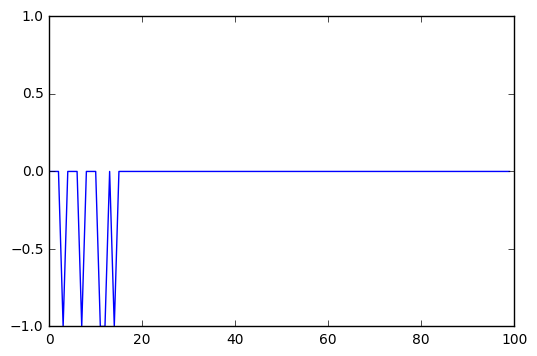

In [2]:
from random import choice 
from numpy import array, dot, random, log
import matplotlib.pyplot as plt
%matplotlib inline

unit_step = lambda x: 0 if x < 0 else 1 

# Die ersten beiden Werte sind die Inputs, der 3 ist das bias 
# und der 2 Wert des Tupels ist der erwartete Wert 

# OR-Function
training_data = [
    (array([0,0,1]), 0),
    (array([1,0,1]), 1),
    (array([0,1,1]), 1),
    (array([1,1,1]), 1),
]

weights = random.rand(3)
errors  = []
eta     = 0.2
n       = 100 

for i in range(n): 
    x, expected  = choice(training_data)
    result       = dot(weights,x)
    error        = expected - unit_step(result)
    errors.append(error)
    weights     += eta * error * x       

# Konvergenzbetrachtung indem die Fehler geplottet werden
plt.ylim([-1,1])
plt.plot(errors)



## Klassifikation zweier Gauß Funktionen 

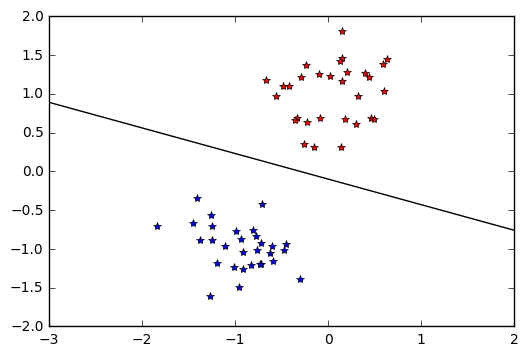

In [12]:
import numpy as np 
from random import choice

unit_step = lambda x: 1 if x > 0 else 0

size = 30

set1 = np.random.normal([0,1],0.35,[size,2])
set2 = np.random.normal([-1,-1],0.35,[size,2])
sets = np.vstack((set1,set2))

training_data = [[np.hstack((x,1)),int(i>size-1)] for i,x in enumerate(sets)]

weights = np.random.rand(3) 
errors = []
eta    = 0.4

n = 60
for i in range(n):
    x, expected = choice(training_data)
    result      = dot(x,weights)
    error       = expected - unit_step(result)
    errors.append(error)
    weights     += eta*error*x
    
# Ergebnisdarstellung
plt.plot(set1[:,0],set1[:,1],'r*')
plt.plot(set2[:,0],set2[:,1],'b*')

# Threshold ist die lineare Funktion die durch die angepassten Gewichte (weights) entsteht
x         = np.linspace(-3,2,50)
threshold = lambda x: -(weights[0]*x+weights[2])/weights[1]
plt.plot(x,threshold(x),'k')   

Ergebnisbetrachtung, indem einerseits die Mengen geplottet werden und andererseits der Grenzübergang, der aus den Gewichten entsteht.

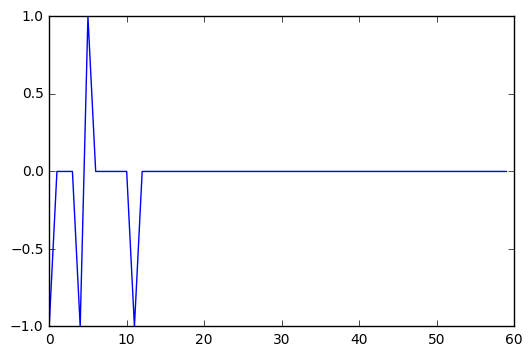

In [13]:
plt.plot(errors)

Erneut die Konvergenzbetrachtung, indem die Fehler geplottet werden

# Eine Erweiterung: Polynomial-Kernel 

In [98]:
import numpy as np 
from random import choice

size = 20

set1 = np.random.normal([0,1],0.7,[size,2])
set2 = np.random.normal([-1,-1],0.7,[size,2])
sets = np.vstack((set1,set2))

training_data = [[np.hstack((x,1)),np.sign(int(i>size-1)-0.5)] for i,x in enumerate(sets)] #Keine bessere Idee für -1,1

c = 1 
K = lambda x,y: (dot(x,y)+c)**2

weights = np.zeros(2*size) # weights now rather is a mistake counter
errors  = []

n = 30 
for i in range(n):
    x, expected  = choice(training_data)
    distance = [expected_i*K(x,xi) for xi,expected_i in training_data]
    result   = dot(weights,distance)
    error    = expected - np.sign(result)
    errors.append(error)
    weights += np.abs(error)/2
    
# Dies ist nichts neues mehr, hier wird der Algorithmus stichprobenartig getestet und die Ergebnisse unten geplottet
predict    = lambda x: np.sign(dot(weights,[expected_i*K(x,xi) for xi,expected_i in training_data]))
x_test     = np.random.normal([-1,-1],1,[30,2])
prediction = []
for x in x_test: 
    x_test_i = np.hstack((x,1))
    prediction.append(predict(x_test_i))

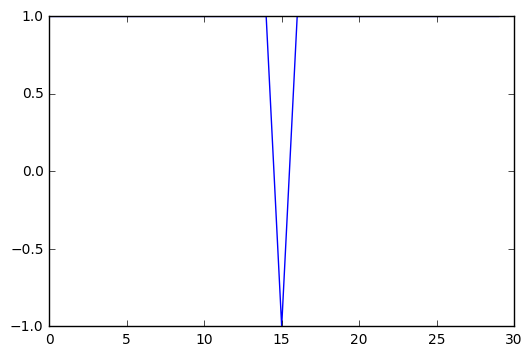

In [99]:
plt.plot(prediction)

Dartellung der Vorhersage für 30 weiter Testdaten der Gruppe 1 

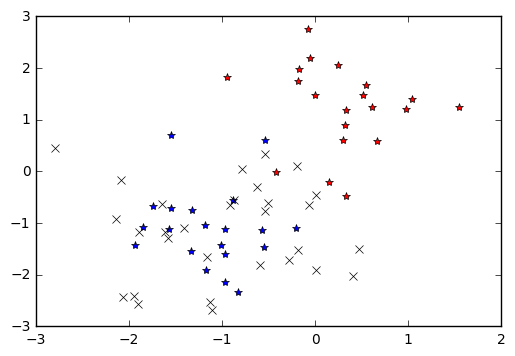

In [100]:
plt.plot(set1[:,0],set1[:,1],'r*')
plt.plot(set2[:,0],set2[:,1],'b*')
plt.plot(x_test[:,0],x_test[:,1],'kx')

Vergleich zwischen den Trainingsdaten mit den Testdaten